In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pachner_traversal.utils import compute_rhat, data_path, set_style

set_style()

In [2]:
result_path = data_path / "results" / "sim_annealing" / "determinant_alexander_polynomial" / "20251002_0957"
assert result_path.exists()

In [3]:
tet_map = {
    l: i for i, l in enumerate("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
}

In [4]:
def get_scores_df(result_path):
    isos_df = pd.read_csv(result_path / "isos.csv")
    scores_df = pd.read_csv(result_path / "scores.csv", index_col=0)

    scores_series = scores_df['score']
    scores_map = scores_series.to_dict()

    chain_scores_df = isos_df.apply(lambda x: x.map(scores_map), axis=1)
    return chain_scores_df

In [5]:
chain_scores_df = get_scores_df(result_path)

In [14]:
chain_scores_df.values.max()

np.float64(4.714285714285714)

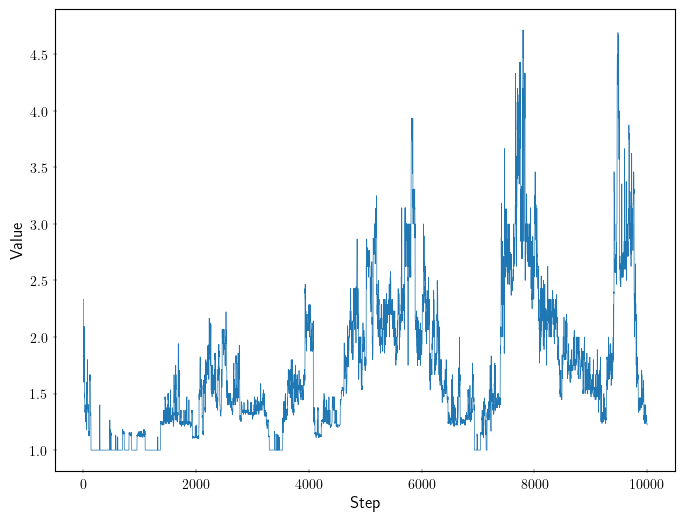

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(chain_scores_df.iloc[:, chain_scores_df.max().argmax()])

plt.xlabel("Step")
plt.ylabel("Value")
plt.savefig(data_path.parent / 'presentation' / 'figures' / 'sim_annealing.pdf', bbox_inches="tight")
plt.show()